In [14]:
import pandas as pd

url = "https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv"
df = pd.read_csv(url)

print(df.head())
print(df.isnull().sum())  # Check missing values

# Encode species to numeric labels
df['Species'] = df['species'].map({'setosa': 0, 'versicolor': 1, 'virginica': 2})


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


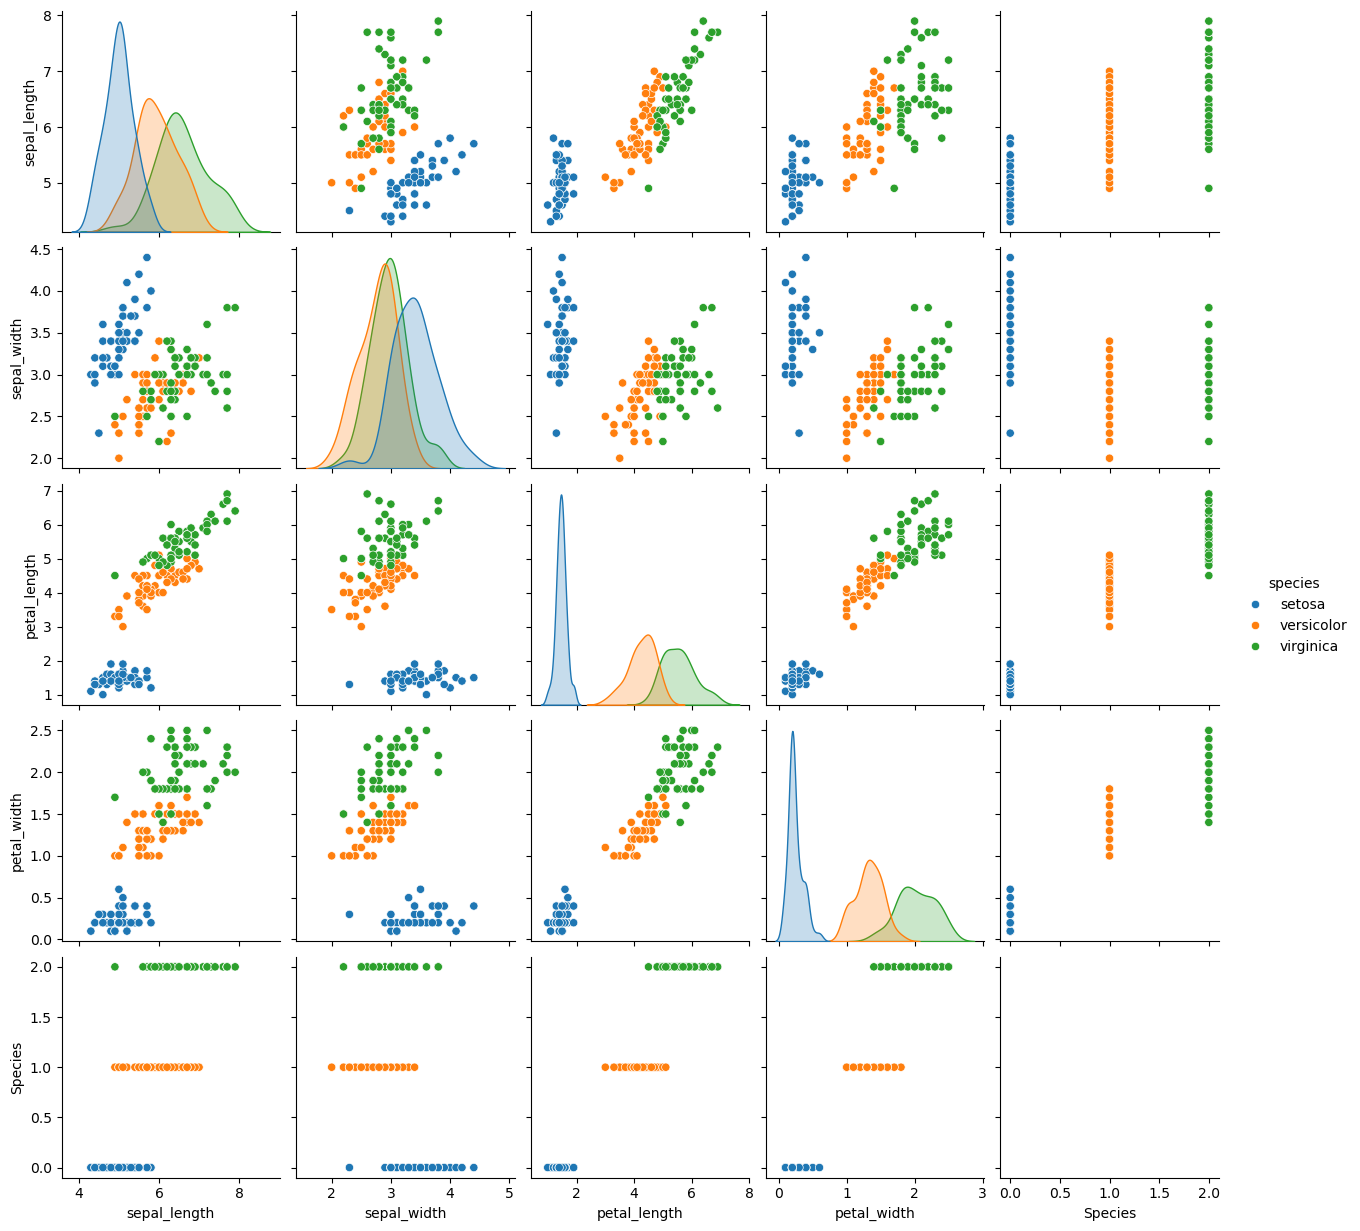

              sepal_length  sepal_width  petal_length  petal_width   Species
sepal_length      1.000000    -0.109369      0.871754     0.817954  0.782561
sepal_width      -0.109369     1.000000     -0.420516    -0.356544 -0.419446
petal_length      0.871754    -0.420516      1.000000     0.962757  0.949043
petal_width       0.817954    -0.356544      0.962757     1.000000  0.956464
Species           0.782561    -0.419446      0.949043     0.956464  1.000000


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot
sns.pairplot(df, hue='species')
plt.show()

# Correlation matrix excluding non-numeric columns
print(df.drop(columns=['species']).corr())

In [21]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['Species']


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

dt_model = DecisionTreeClassifier(random_state=42)
lr_model = LogisticRegression(max_iter=200)


In [29]:
dt_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)


LogisticRegression(max_iter=200)

In [25]:
from sklearn.datasets import load_iris
import pandas as pd

# Load dataset
iris = load_iris()
X = iris.data  # features
y = iris.target  # target labels

# Check shape
print(X.shape, y.shape)


(150, 4) (150,)


In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [29]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)


DecisionTreeClassifier()

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Model Accuracy: {accuracy * 100:.2f}%")

print("\n🧾 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))


✅ Model Accuracy: 100.00%

🧾 Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

📊 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred_dt = dt_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))


Decision Tree Accuracy: 1.0
Decision Tree Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Logistic Regression Accuracy: 1.0
Logistic Regression Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
wei

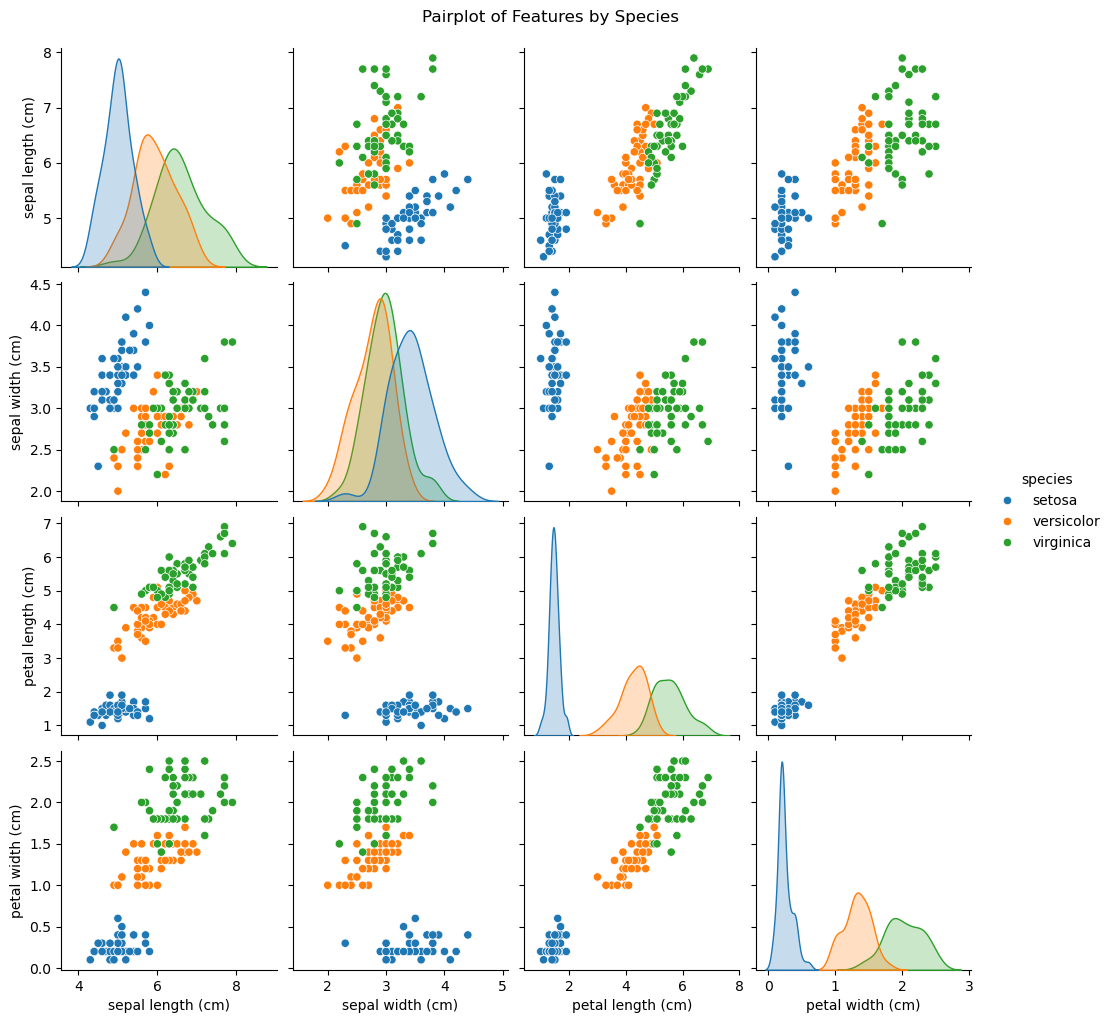

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

# Load dataset into a DataFrame
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target_names[iris.target]

# Pairplot
sns.pairplot(df, hue='species')
plt.suptitle("Pairplot of Features by Species", y=1.02)
plt.show()


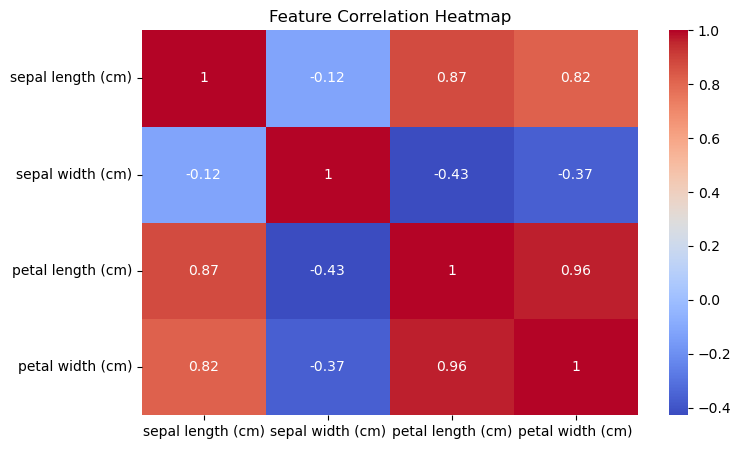

In [35]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.iloc[:, :-1].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


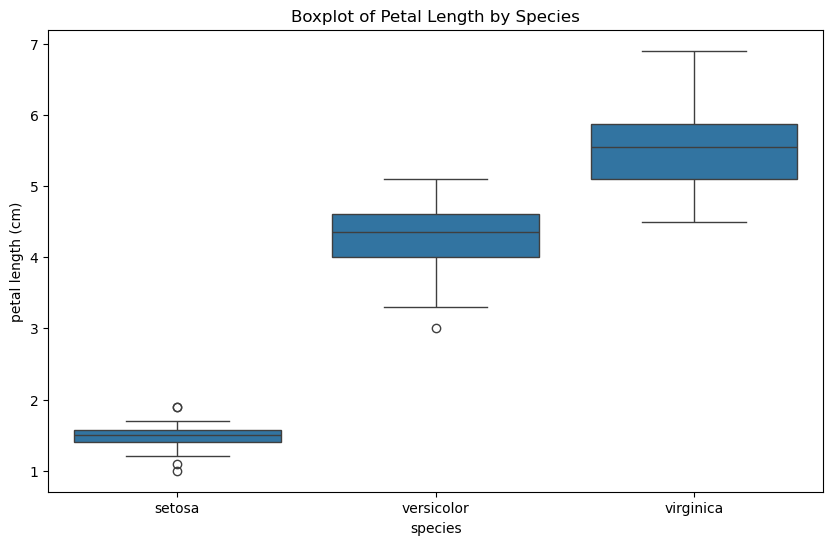

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='petal length (cm)', data=df)
plt.title("Boxplot of Petal Length by Species")
plt.show()


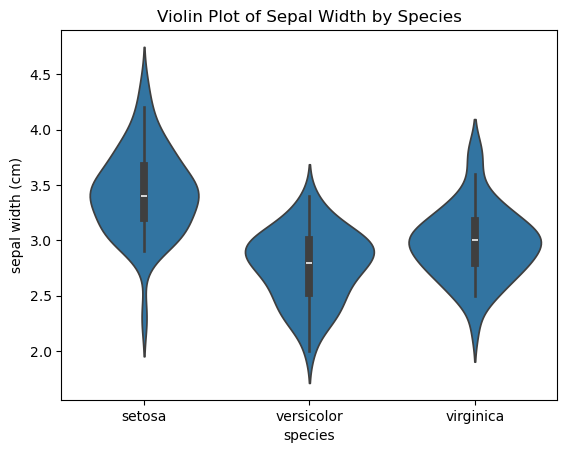

In [39]:
sns.violinplot(x='species', y='sepal width (cm)', data=df)
plt.title("Violin Plot of Sepal Width by Species")
plt.show()


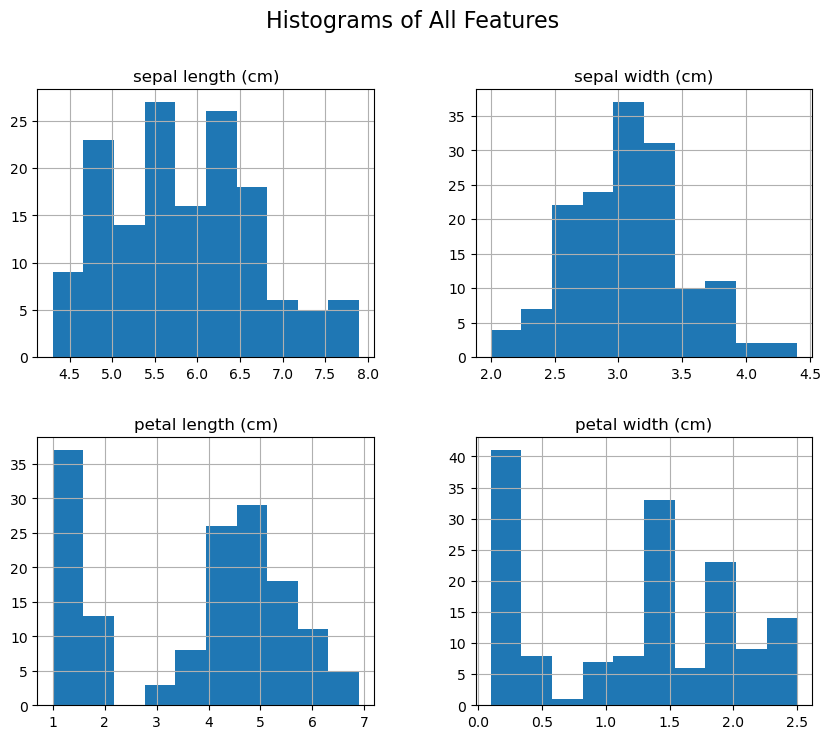

In [41]:
df.iloc[:, :-1].hist(figsize=(10, 8))
plt.suptitle("Histograms of All Features", fontsize=16)
plt.show()


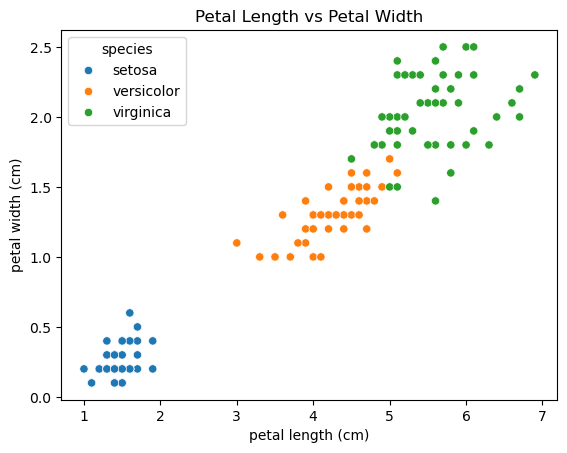

In [43]:
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='species')
plt.title("Petal Length vs Petal Width")
plt.show()


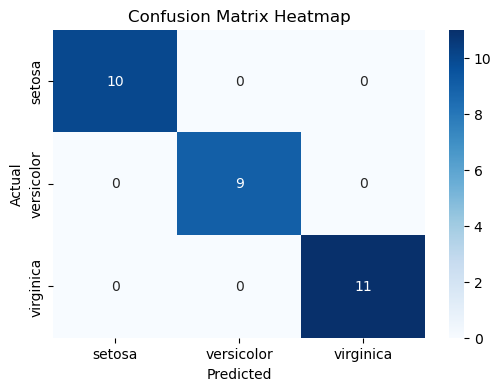

In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()
